In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [193]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import plot_tree, plot_importance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Artificial Intelligence is an integral part of all major e-commerce companies today. Today's online retail platforms are heavily powered by algorithms and applications that use AI. Machine learning is used in a variety of ways, from inventory control and quality assurance in the warehouse to product recommendations and sales demographics on the website.

Let’s say you want to create a promotional campaign for an e-commerce store and offer discounts to customers in the hopes that this might increase your sales.

You have been provided descriptions of products on Amazon and Flipkart, including details like product title, ratings, reviews, and actual prices. In this challenge, you will predict discounted prices of the listed products based on their ratings and actual prices.

In [128]:
df= pd.read_csv('train.csv')

In [129]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [130]:
df.shape

(15730, 16)

In [131]:
df.nunique()

id            15730
title          4782
Rating           34
maincateg         2
platform          2
price1         1478
actprice1       885
Offer %        2530
norating1      2770
noreviews1     1122
star_5f        2196
star_4f        1448
star_3f        1107
star_2f         759
star_1f        1001
fulfilled1        2
dtype: int64

In [132]:
df.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [133]:
df.dropna(axis=0, how='any', inplace= True)

In [134]:
df['Offer %']= df['Offer %'].str.replace('%','')
df['Offer %']=df['Offer %'].astype('float')

In [135]:
df.columns

Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'price1', 'actprice1',
       'Offer %', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f',
       'star_2f', 'star_1f', 'fulfilled1'],
      dtype='object')

In [136]:
df.describe()

,id,Rating,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,14945.000000,14945.000000,14945.000000,14945.000000,14945.000000,14945.000000,14945.00000,14945.000000,14945.000000,14945.000000,14945.000000,14945.000000,14945.000000
mean,10456.992372,4.013643,688.177451,1369.647240,46.817653,3042.656206,423.37270,1585.725460,650.540582,355.175176,153.516962,273.113416,0.600067
std,6078.456418,0.298781,647.766547,1240.115764,19.248629,11832.326879,1739.24676,6204.427825,2806.356178,1406.515194,553.513055,952.268346,0.489901
min,3.000000,0.000000,69.000000,42.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5181.000000,3.900000,349.000000,699.000000,36.020000,63.000000,9.00000,30.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,10439.000000,4.000000,474.000000,999.000000,50.080000,304.000000,44.00000,150.000000,60.000000,34.000000,17.000000,29.000000,1.000000
75%,15731.000000,4.200000,699.000000,1299.000000,60.160000,1523.000000,215.00000,787.000000,299.000000,172.000000,76.000000,139.000000,1.000000
max,20973.000000,5.000000,5984.000000,13499.000000,88.930000,289973.000000,45448.00000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000


In [137]:
df.drop(['id','title','price1','norating1', 'noreviews1'], axis=1, inplace= True)
df.shape

(14945, 11)

<AxesSubplot:>

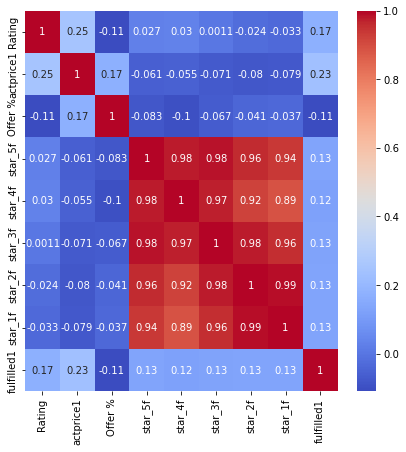

In [103]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

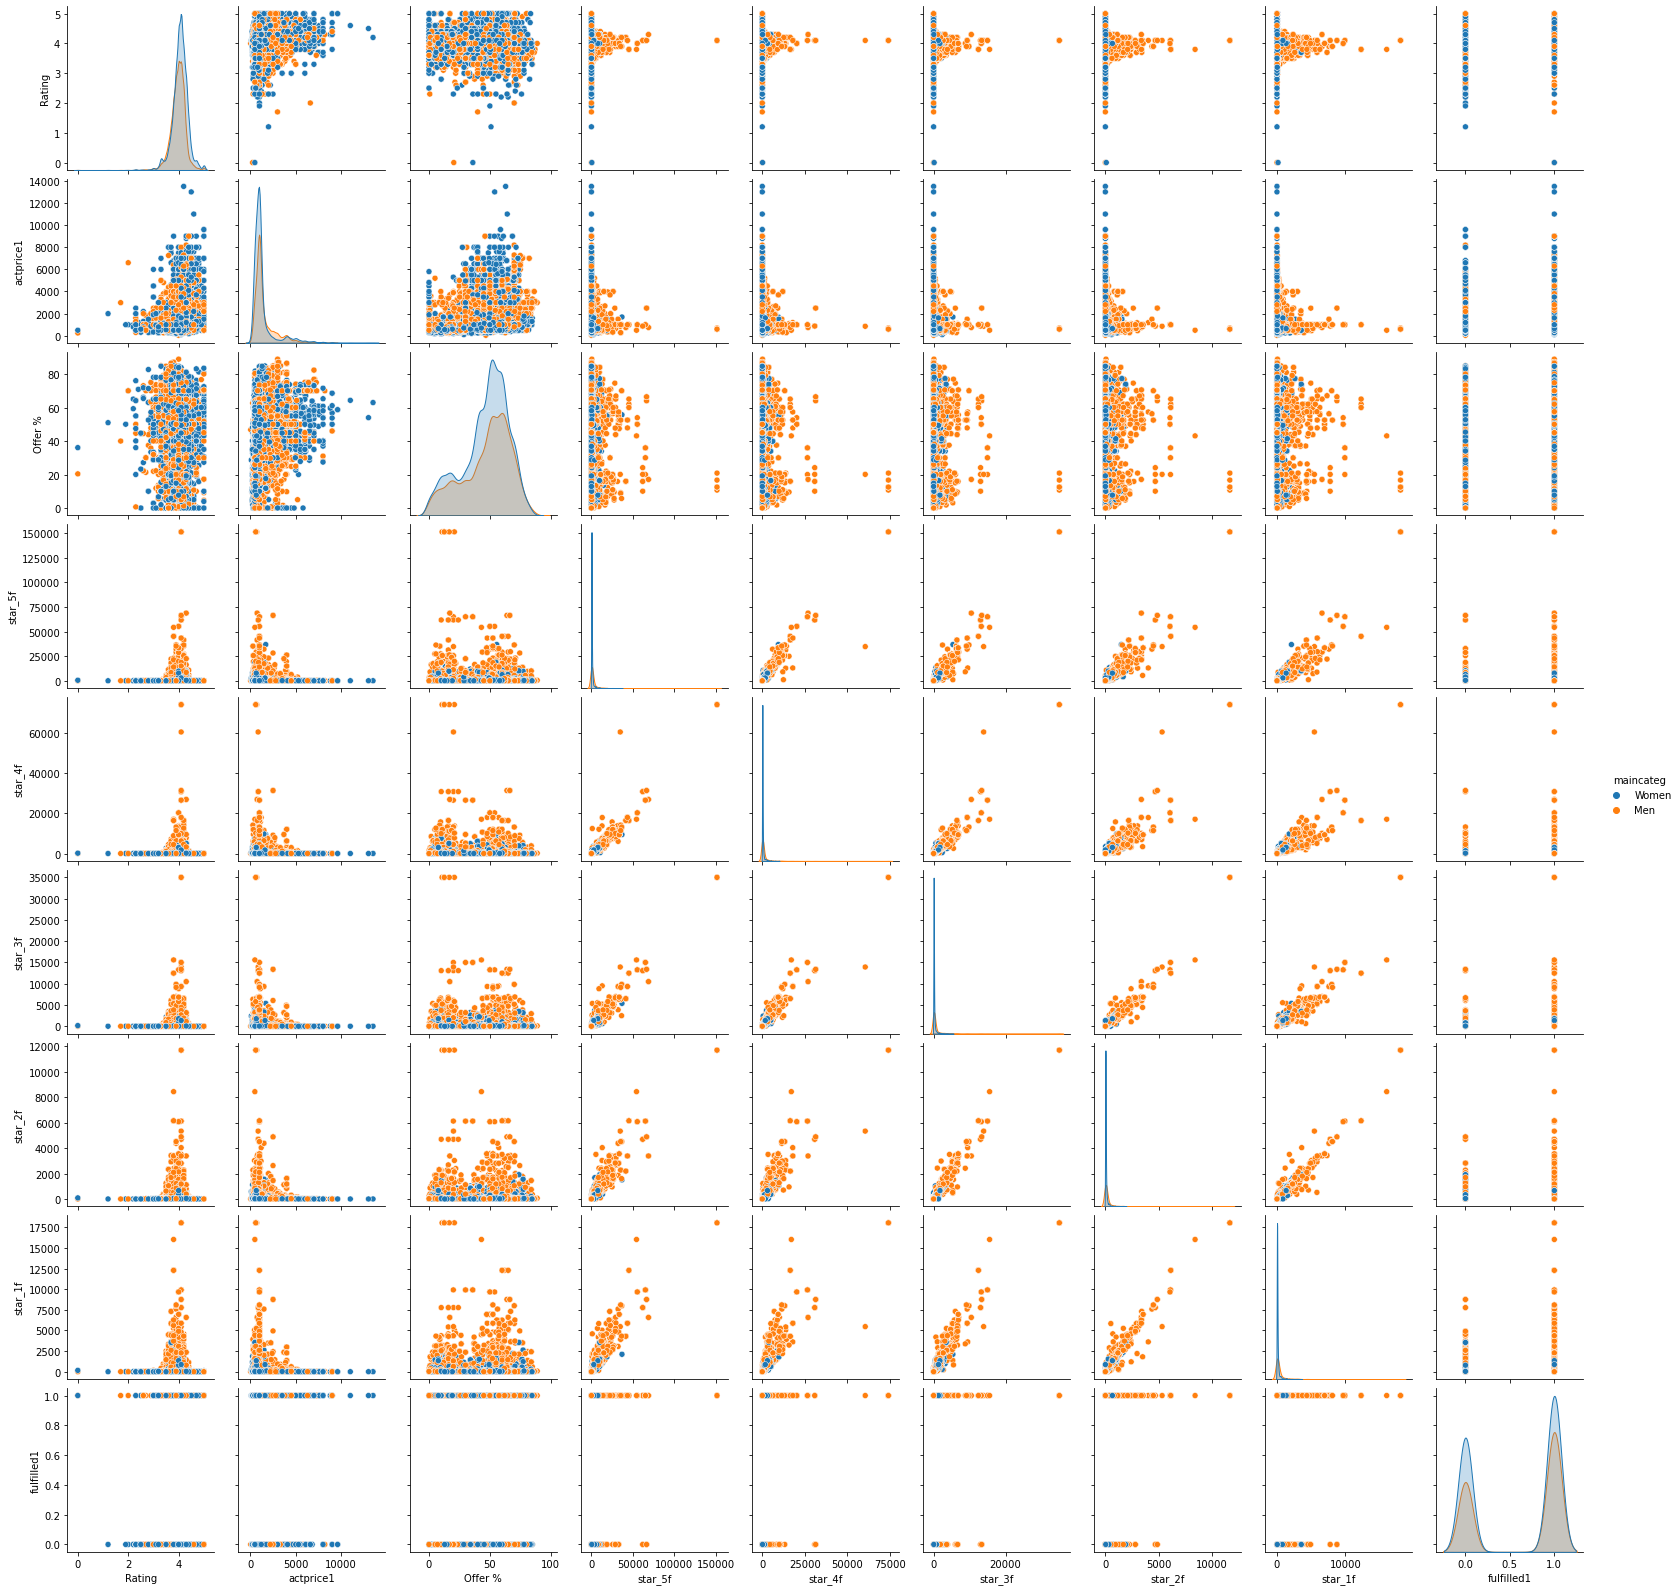

In [104]:
sns.pairplot(df, hue='maincateg')

<AxesSubplot:>

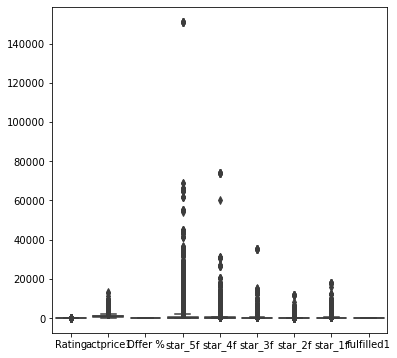

In [105]:
plt.figure(figsize=(6,6))
sns.boxplot( data= df)

<AxesSubplot:>

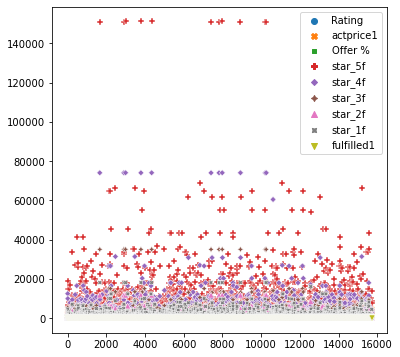

In [106]:
plt.figure(figsize=(6,6))
sns.scatterplot(data= df )

In [142]:
categ= pd.get_dummies(df.maincateg, drop_first= True)
plat= pd.get_dummies(df.platform, drop_first= True)
df1= df.drop(['maincateg', 'platform'], axis=1)

In [143]:
df1= pd.concat([categ, plat, df1], axis=1)
df1.columns

Index(['Women', 'Flipkart', 'Rating', 'actprice1', 'Offer %', 'star_5f',
       'star_4f', 'star_3f', 'star_2f', 'star_1f', 'fulfilled1'],
      dtype='object')

In [146]:
X= df1.drop(['Offer %'], axis=1)
Y= df1['Offer %']

In [110]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test= train_test_split(X,Y, test_size=0.33, random_state= 42)

In [176]:
X_Train.columns

Index(['Women', 'Flipkart', 'Rating', 'actprice1', 'star_5f', 'star_4f',
       'star_3f', 'star_2f', 'star_1f', 'fulfilled1'],
      dtype='object')

In [112]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaledTrain=scaler.fit_transform(X_Train)
X_scaledTest=scaler.transform(X_Test)

In [113]:
def model(method):    
    global predictions
    model_name= method
    model_name.fit(X_Train, y_Train)
    predictions= model_name.predict(X_Test)
    mae= mean_absolute_error(y_Test, predictions)
    return(print('The MAE for the method', method, 'is = ', mae))

In [194]:
model(RandomForestRegressor())
model(LinearRegression())
model(KNeighborsRegressor())
model(DecisionTreeRegressor())
model(XGBRegressor())
model(AdaBoostRegressor())
model(ExtraTreesRegressor())

The MAE for the method RandomForestRegressor() is =  6.95354171836292
The MAE for the method LinearRegression() is =  14.396468451852748
The MAE for the method KNeighborsRegressor() is =  10.549991889699918
The MAE for the method DecisionTreeRegressor() is =  7.380136755107557
The MAE for the method XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) is =  8.51

In [195]:
estimator = ExtraTreesRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30,40,50],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8,10,12],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=10)
grid.fit(X_Train, y_Train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8, 10, 12],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [196]:
print(grid.best_estimator_, grid.best_params_, grid.best_score_)

ExtraTreesRegressor(max_features='sqrt', n_estimators=50) {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50} 0.6804693579290648


In [197]:
best_grid= grid.best_estimator_
P_final= best_grid.predict(X_Test)

In [198]:
mae= mean_absolute_error(y_Test, P_final)
print(mae)

5.835654047619059


In [199]:
X_TESTFINAL= pd.read_csv('test.csv')
X_TESTFINAL.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [200]:
X_TESTFINAL.isnull().sum()

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [201]:
X_TESTFINAL.shape

(5244, 14)

In [202]:
ID= X_TESTFINAL.id

In [203]:
X_TESTFINAL['star_5f']=X_TESTFINAL['star_5f'].fillna(X_TESTFINAL['star_5f'].median())
X_TESTFINAL['Rating']=X_TESTFINAL['Rating'].fillna(X_TESTFINAL['Rating'].median())
X_TESTFINAL['star_1f']=X_TESTFINAL['star_1f'].fillna(X_TESTFINAL['star_1f'].median())
X_TESTFINAL['maincateg']=X_TESTFINAL['maincateg'].fillna(X_TESTFINAL['maincateg'].mode()[0])

In [204]:
X_TESTFINAL.drop(['id','title'], axis=1, inplace= True)

In [205]:
X_TESTFINAL.isnull().sum()

Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [206]:
categ= pd.get_dummies(X_TESTFINAL.maincateg, drop_first= True)
plat= pd.get_dummies(X_TESTFINAL.platform, drop_first= True)
X_TESTFINAL.drop(['maincateg', 'platform','noreviews1','norating1'], axis=1 , inplace=True)

In [207]:
X_TESTFINAL.shape

(5244, 8)

In [208]:
df_test= pd.concat([categ, plat, X_TESTFINAL], axis=1)

In [209]:
'''from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_fTrain=scaler.fit_transform(df_test)'''

'from sklearn.preprocessing import StandardScaler\nscaler= StandardScaler()\nX_fTrain=scaler.fit_transform(df_test)'

In [210]:
Y_Output= pd.DataFrame(best_grid.predict(df_test))
Y_Output.columns=['Offer_Discount']

In [211]:
Price1 = (df_test.actprice1)-((Y_Output.Offer_Discount)*0.01*(df_test.actprice1))

In [212]:
PREDICTIONS = pd.concat([ID,Price1], axis=1)
PREDICTIONS.columns=['ID', 'price1']

In [213]:
PREDICTIONS.to_csv('C:\\Users\\lenovo\\Downloads\\SUMMER ANALYTICS\\CAPSTONE HACKATHON\\final_day2_2.csv', index=False)

In [214]:
PREDICTIONS

,ID,price1
0,2242,430.968600
1,20532,305.132512
2,10648,499.000500
3,20677,1121.080182
4,12593,392.608332
...,...,...
5239,14033,384.185778
5240,297,950.062436
5241,18733,392.996610
5242,6162,228.569445
